In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data_path = "C:\\Users\\mainu\\Downloads\\archive (5)\\Food_Production.csv"
data = pd.read_csv(data_path)


In [3]:
print(data.head())


          Food product  Land use change  Animal Feed  Farm  Processing  \
0  Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1         Maize (Meal)              0.3          0.0   0.5         0.1   
2        Barley (Beer)              0.0          0.0   0.2         0.1   
3              Oatmeal              0.0          0.0   1.4         0.0   
4                 Rice              0.0          0.0   3.6         0.1   

   Transport  Packging  Retail  Total_emissions  \
0        0.1       0.1     0.1              1.4   
1        0.1       0.1     0.0              1.1   
2        0.0       0.5     0.3              1.1   
3        0.1       0.1     0.0              1.6   
4        0.1       0.1     0.1              4.0   

   Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  ...  \
0                                                NaN         ...   
1                                                NaN         ...   
2                                           

In [4]:
most_damaging_foods = data.sort_values(by='Total_emissions', ascending=False).head(10)


In [5]:
production_stages_contribution = data[['Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail']].sum()


In [6]:
plant_based_vs_animal_based = data.groupby('Food product')[['Total_emissions']].mean()


In [8]:
# Print the list of column names
print(data.columns)


Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

In [16]:
protein_column = 'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)'
threshold_value = 20


In [17]:
protein_rich_foods = data[data[protein_column] > threshold_value]
print(protein_rich_foods[['Food product', protein_column]])


         Food product  \
4                Rice   
5            Potatoes   
20           Tomatoes   
21     Onions & Leeks   
23          Brassicas   
25       Citrus Fruit   
26            Bananas   
27             Apples   
28   Berries & Grapes   
31             Coffee   
32     Dark Chocolate   
33   Beef (beef herd)   
34  Beef (dairy herd)   
35      Lamb & Mutton   
36           Pig Meat   
37       Poultry Meat   
38               Milk   
39             Cheese   
41      Fish (farmed)   

    Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)  
4                                           49.394366                      
5                                           20.470588                      
20                                          68.272727                      
21                                          24.923077                      
23                                          45.545455                      
25                                         

In [18]:
protein_rich_footprint = protein_rich_foods.groupby('Food product')[['Total_emissions']].mean()
print(protein_rich_footprint)


                   Total_emissions
Food product                      
Apples                         0.3
Bananas                        0.8
Beef (beef herd)              59.6
Beef (dairy herd)             21.1
Berries & Grapes               1.1
Brassicas                      0.4
Cheese                        21.2
Citrus Fruit                   0.3
Coffee                        16.5
Dark Chocolate                18.7
Fish (farmed)                  5.1
Lamb & Mutton                 24.5
Milk                           2.8
Onions & Leeks                 0.3
Pig Meat                       7.2
Potatoes                       0.3
Poultry Meat                   6.1
Rice                           4.0
Tomatoes                       1.4


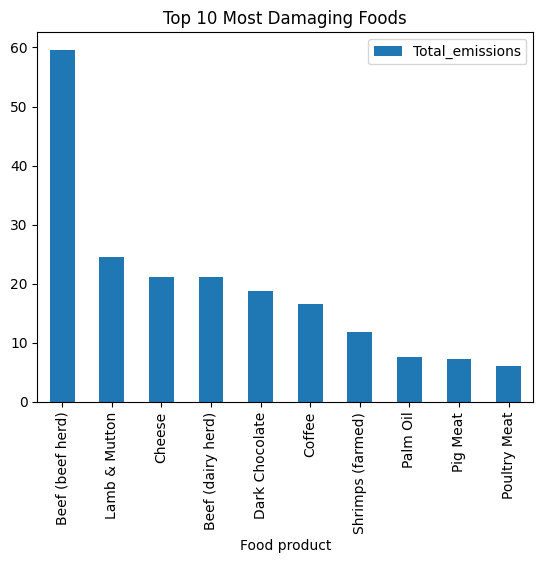

In [19]:
most_damaging_foods.plot(kind='bar', x='Food product', y='Total_emissions', title='Top 10 Most Damaging Foods')
plt.show()


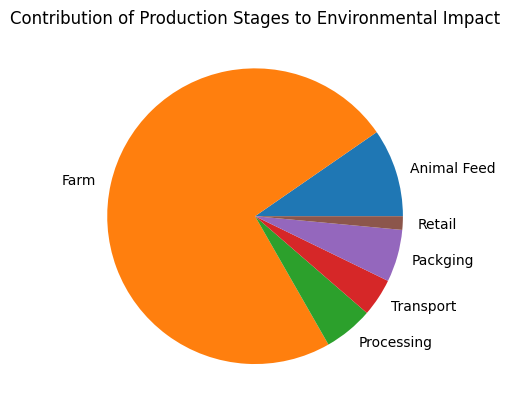

In [20]:
production_stages_contribution.plot(kind='pie', title='Contribution of Production Stages to Environmental Impact')
plt.show()


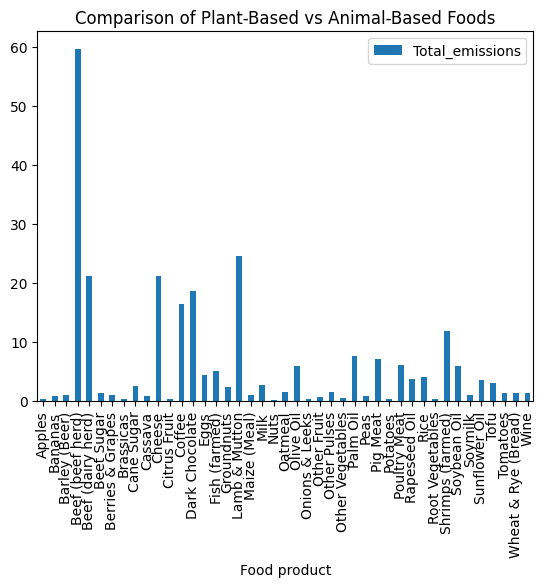

In [21]:
plant_based_vs_animal_based.plot(kind='bar', title='Comparison of Plant-Based vs Animal-Based Foods')
plt.show()


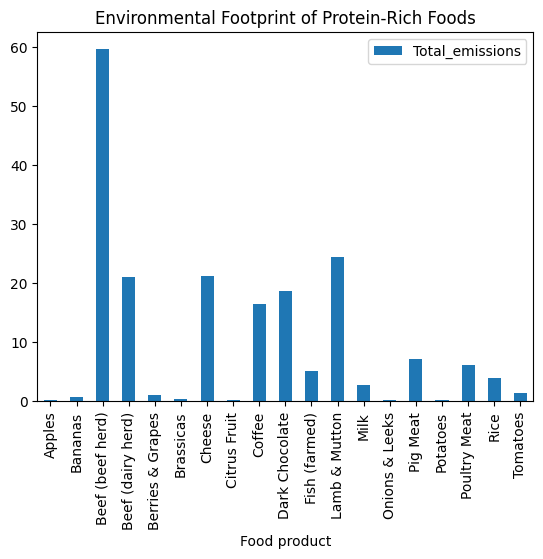

In [22]:
protein_rich_footprint.plot(kind='bar', title='Environmental Footprint of Protein-Rich Foods')
plt.show()
